# Detecção de Fake News com Naive Bayes

Neste projeto, vamos construir um modelo de detecção de fake news utilizando o algoritmo Naive Bayes.

## 1. Importação das Bibliotecas

Primeiro, importamos as bibliotecas necessárias para a análise.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk as nlp
import sklearn as sk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer  
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

## 2. Leitura de Dados
Aqui, vamos carregar os datasets de notícias falsas e verdadeiras.

In [3]:
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")
# Rows and columns of fake news dataset
fake_df.shape
fake_df.info()
fake_df.describe()
fake_df.head()
fake_df.isnull().sum()
# Rows and columns of fake news dataset
true_df.shape
true_df.info()
true_df.describe()
true_df.head()
true_df.isnull().sum()
# Adding 'Fake' column to our datasets then join them together
fake_df['Fake']=1
true_df['Fake']=0
concat_df=pd.concat([fake_df,true_df],axis = 0)
concat_df['full_text'] = concat_df['title'] + ' ' + concat_df['subject']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


## 3. Pré-processamento de Texto
Aqui, aplicamos o pré-processamento nos textos das notícias, como tokenização, remoção de stopwords e lematização

In [4]:
# Funções para processamento de texto  
def process_text(text):  
    # Tokenização  
    tokens = word_tokenize(text.lower())  
    # Remover stopwords e não alfabéticos  
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]  
    # Lematização  
    lemmatizer = WordNetLemmatizer()  
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]  
    return ' '.join(lemmatized)  

# Aplicar o processamento no texto completo  
concat_df['processed_text'] = concat_df['full_text'].apply(process_text) 

## 4. Treinamento do Modelo
Neste passo, vamos treinar o modelo Naive Bayes para classificar as notícias como verdadeiras ou falsas.

In [5]:
# dividindo target e features
y = concat_df['Fake']
x = concat_df['processed_text'] 
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
# vetorizando
vectorizer = TfidfVectorizer()  
x_train_vectorized = vectorizer.fit_transform(x_train)  
x_test_vectorized = vectorizer.transform(x_test)  
# Inicializar o modelo e treinar  
model = MultinomialNB()  
model.fit(x_train_vectorized, y_train)  #treinando

## 5. Avaliação do Modelo
Após treinar o modelo, vamos avaliá-lo calculando a acurácia e exibindo a matriz de confusão.

In [6]:
# Prever no conjunto de teste  
y_pred = model.predict(x_test_vectorized)  
print("Acurácia:", round(accuracy_score(y_test, y_pred)*100,2),'%')
print(classification_report(y_test, y_pred))  
print(sk.metrics.confusion_matrix(y_test, y_pred))

Acurácia: 97.33 %
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4247
           1       0.98      0.97      0.97      4733

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980

[[4145  102]
 [ 138 4595]]


## 6. Visualização da Matriz de Confusão
Por fim, vamos visualizar a matriz de confusão com um heatmap.

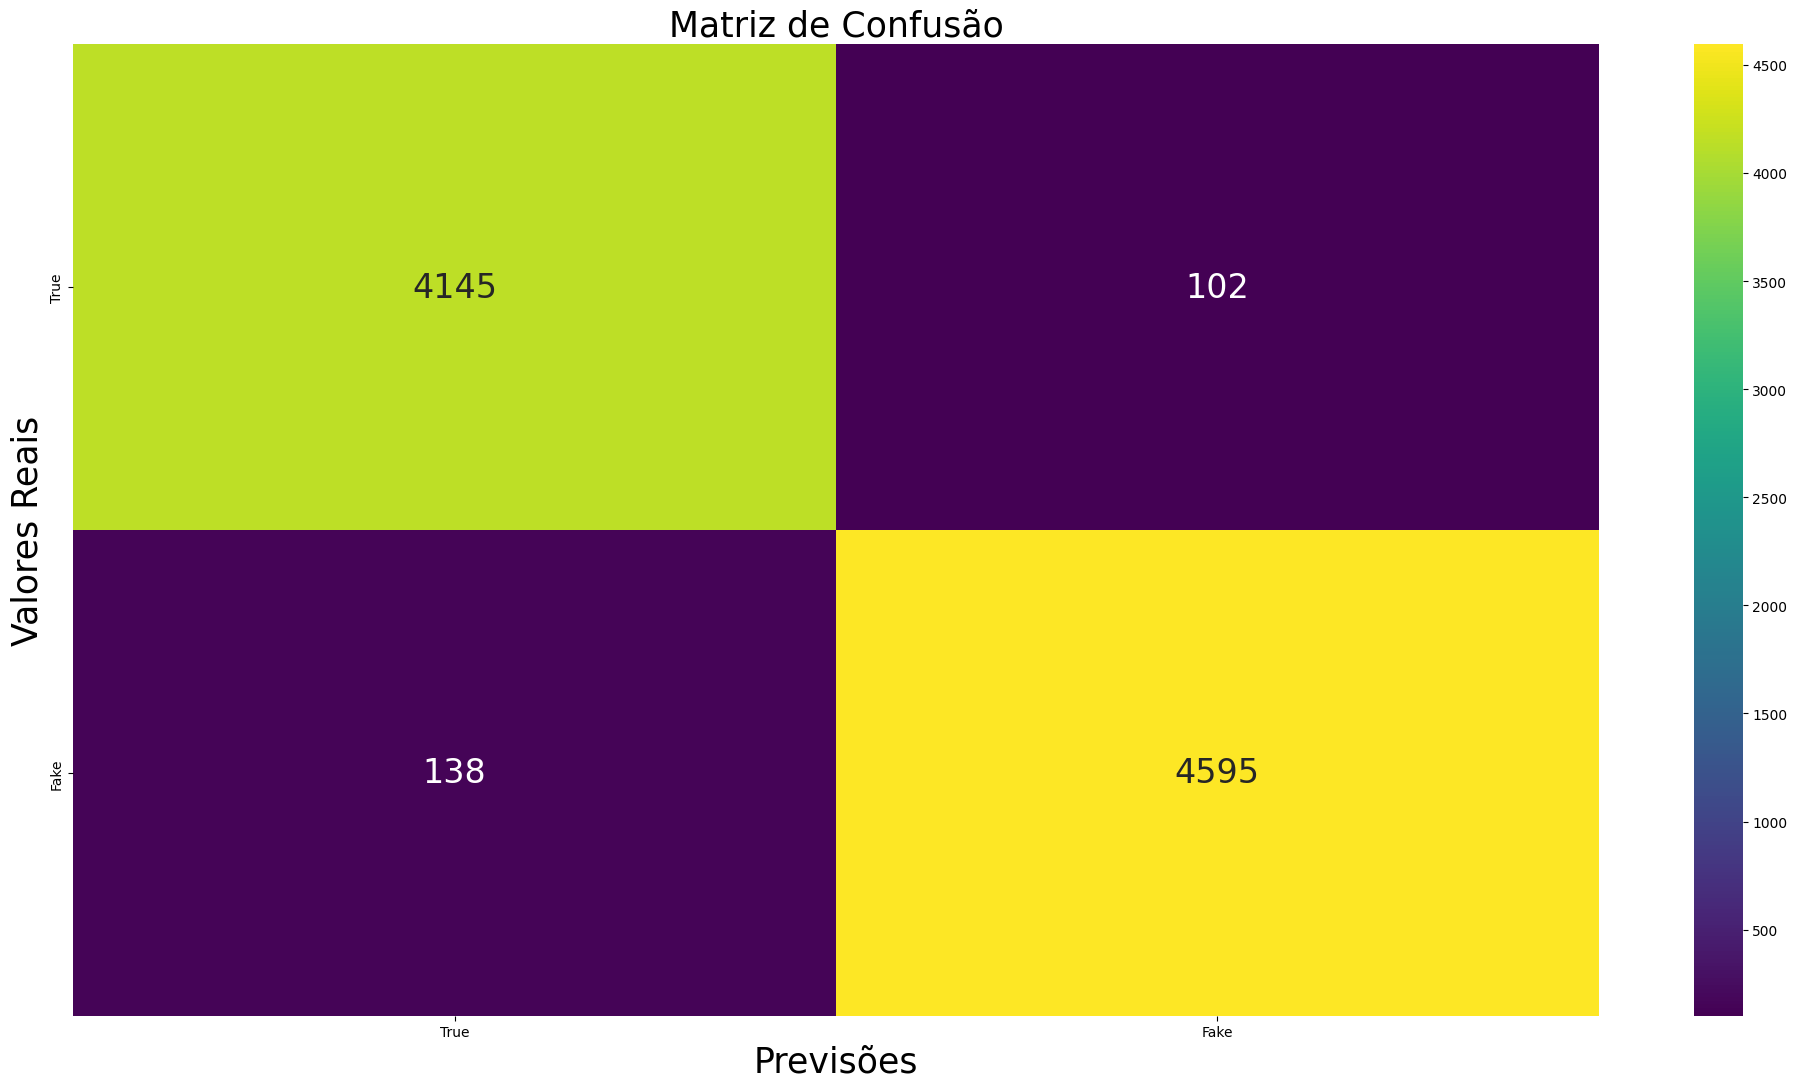

In [7]:
# Calcular a matriz de confusão  
cm = sk.metrics.confusion_matrix(y_test, y_pred)  
# Criar um heatmap  
plt.figure(figsize=(20, 11))  
sns.heatmap(cm, annot=True,fmt='d',
            xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'], cmap='viridis',
            annot_kws={"size": 24})  
plt.title('Matriz de Confusão',fontsize=25)  
plt.xlabel('Previsões',fontsize=25)  
plt.ylabel('Valores Reais',fontsize=25)  
plt.tight_layout()
plt.savefig('Confusionmatrix_FakeNews')
plt.show()     